# Develop A Neural Network That Can Read Handwriting

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import random
import math
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.regularizers import l2


from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('number of images : ', x_train.shape[0]) 
print('Dimensions of X: ', x_train.shape[1], 'x', x_train.shape[2])

number of images :  60000
Dimensions of X:  28 x 28


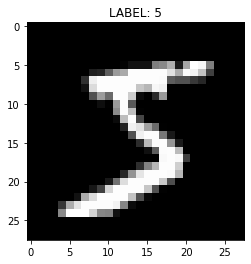

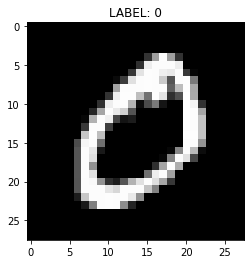

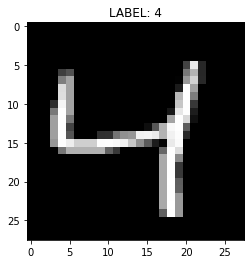

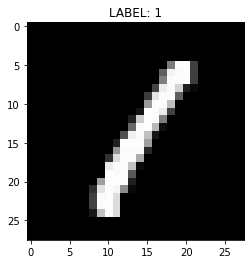

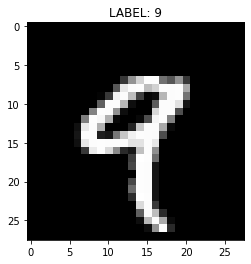

In [4]:
for i in range(5): 
    plt.title('LABEL: {label}'.format(label=y_train[i]))
    plt.imshow(x_train[i], cmap='gray')
    plt.show()

In [5]:
model = Sequential([Dense(50, input_shape=(784,), kernel_regularizer=l2(.005)), 
                       Activation('relu'),
                       Dense(30),
                       Activation('relu'),
                       Dense(30),
                       Activation('relu'),
                       Dense(10),
                       Activation('softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
y_train_hot = keras.utils.to_categorical(y_train, num_classes=10)

#test if one-hot worked, should have a one in the 6th place to represent 5
#y_train_hot[0]

x_train_unroll = x_train.reshape(60000, 784)
x_test_unroll = x_test.reshape(10000, 784)

In [7]:
model.fit(x_train_unroll, y_train_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 998us/step - loss: 1.3831 - accuracy: 0.7988
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4536 - accuracy: 0.9180
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3344 - accuracy: 0.9341
Epoch 4/10
1875/1875 [==============================] - 2s 817us/step - loss: 0.2923 - accuracy: 0.9390
Epoch 5/10
1875/1875 [==============================] - 1s 774us/step - loss: 0.2666 - accuracy: 0.9439
Epoch 6/10
1875/1875 [==============================] - 1s 763us/step - loss: 0.2563 - accuracy: 0.9465
Epoch 7/10
1875/1875 [==============================] - 1s 753us/step - loss: 0.2464 - accuracy: 0.9502
Epoch 8/10
1875/1875 [==============================] - 1s 744us/step - loss: 0.2370 - accuracy: 0.9520
Epoch 9/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.2335 - accuracy: 0.95280s - loss: 0.2315 - accura
Epoch 10/10
1875/1875 [===================

In [8]:
prediction_hot = model.predict(x_test_unroll)
prediction = []

#convert from one-hot to regular
for line in prediction_hot:
    prediction.append(np.argmax(line))

PREDICTION:  8


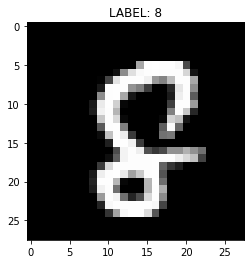

PREDICTION:  6


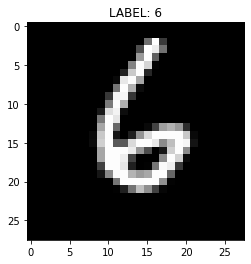

PREDICTION:  1


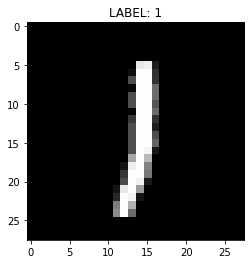

PREDICTION:  9


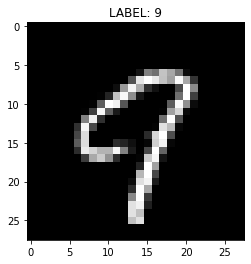

PREDICTION:  5


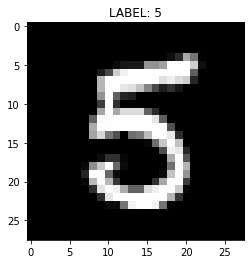

In [9]:
num = math.ceil(random.uniform(1,9995))
for i in range(num, num+5):
    print('PREDICTION: ', prediction[i])
    plt.title('LABEL: {label}'.format(label=y_test[i]))
    plt.imshow(x_test[i], cmap='gray')
    plt.show()

In [10]:
correct = 0
incorrect = 0

for i in prediction:
    if prediction[i] == y_test[i]:
        correct += 1
    else:
        incorrect += 1

accuracy = correct / y_test.shape[0]

print(correct)
print('Test Prediction Accuracy: ', accuracy * 100, '%')

8958
Test Prediction Accuracy:  89.58 %


PREDICTION:  6


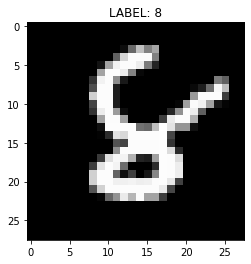

PREDICTION:  6


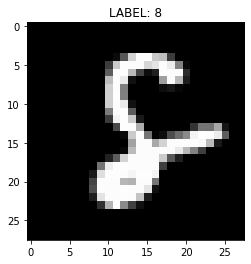

PREDICTION:  6


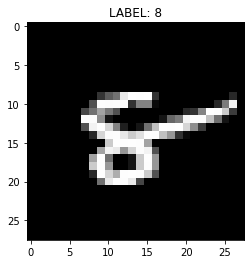

PREDICTION:  6


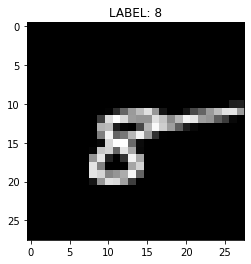

PREDICTION:  6


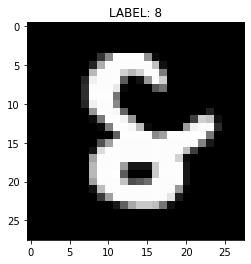

In [11]:
label_miss = 8
prediction_miss = 6
for i in range(10000):
    if prediction[i] == prediction_miss and y_test[i] == label_miss:
        print('PREDICTION: ', prediction[i])
        plt.title('LABEL: {label}'.format(label=y_test[i]))
        plt.imshow(x_test[i], cmap='gray')
        plt.show()